In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(city_df, ride_df, how="outer", on="city")

#Display the data table for preview
merged_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [112]:
#obtain the x and y
city_df = merged_df[['city', 'type', 'fare', 'driver_count']]

type_df = merged_df.groupby('city').mean()

avg_city = city_df.groupby('city').count()
fare_avg = city_df.groupby('city').mean()

num_of_cities = len(avg_city) # finds the number of cities
num_of_trips = avg_city['type'] #finds the number of days recorded
avg_fare = fare_avg['fare'].round(2) #finds the average fare rounded to the second decimal
num_of_drivers = type_df['driver_count']


avg_city['Average Fare'] = avg_fare
avg_city['Number of Trips'] = num_of_trips
avg_city['Number of Drivers'] = num_of_drivers
avg_city

table_df = avg_city[['Average Fare', 'Number of Trips', 'Number of Drivers']]
table_df

,Average Fare,Number of Trips,Number of Drivers
city,,,
Amandaburgh,24.64,18,12.0
Barajasview,25.33,22,26.0
Barronchester,36.42,16,11.0
Bethanyland,32.96,18,22.0
Bradshawfurt,40.06,10,7.0
Brandonfort,35.44,19,10.0
Carriemouth,28.31,27,52.0
Christopherfurt,24.50,27,41.0
Colemanland,30.89,22,23.0


## Bubble Plot of Ride Sharing Data

Text(0.5, 1.0, 'Pyber Ride Shares')

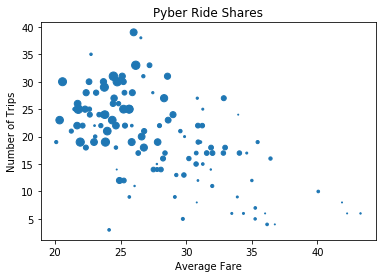

In [117]:
table_df.plot.scatter(x='Average Fare', y='Number of Trips', s=table_df['Number of Drivers']);
plt.title('Pyber Ride Shares')

## Total Fares by City Type

In [127]:
# Calculate Type Percents
city_typedf = merged_df.groupby('type').mean()
total_df = merged_df.groupby('type').sum()



average_fare_type = city_typedf['fare']
total_fare = total_df['fare']

total_df['Percentage By Type'] = ((average_fare_type)/(total_fare))*10000

perc_pie = total_df['Percentage By Type']

perc_pie
# Build Pie Chart



type
Rural       80.000000
Suburban    16.000000
Urban        6.153846
Name: Percentage By Type, dtype: float64

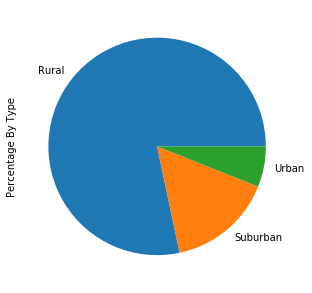

In [128]:
# Show Figure
plot = perc_pie.plot.pie(y='Percentage By Type', figsize=(5, 5))

## Total Rides by City Type

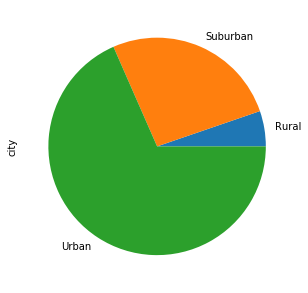

In [139]:
# Calculate Ride Percents
count_df = merged_df.groupby('type').count()
sum_of_trips = count_df['city'].sum()

count_df

pie_trip_by_type = ((count_df['city'])/sum_of_trips)*100
pie_trip_by_type

# Build Pie Chart
pie_trip_by_type.plot.pie(y=pie_trip_by_type, figsize=(5, 5))
